# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress as reg

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# generating query
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

619

In [4]:
requests.get(query_url + "London").json()

{'coord': {'lon': -0.1257, 'lat': 51.5085},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 45.99,
  'feels_like': 39.36,
  'temp_min': 45,
  'temp_max': 46.99,
  'pressure': 1014,
  'humidity': 80},
 'visibility': 10000,
 'wind': {'speed': 15.52, 'deg': 325, 'gust': 33.62},
 'clouds': {'all': 100},
 'dt': 1617600579,
 'sys': {'type': 3,
  'id': 2019646,
  'country': 'GB',
  'sunrise': 1617600383,
  'sunset': 1617647973},
 'timezone': 3600,
 'id': 2643743,
 'name': 'London',
 'cod': 200}

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
lats = []
longs = []
mtemps = []
hum = []
cloud = []
wind = []
country = []
date = []
cityname = []
record = 0

print(f'Beginning Data Retrieval')
print(f'----------------------------------')
for city in cities:
    response = requests.get(query_url + city).json()
    
    try:
        cityname.append(response["name"])
        lats.append(response["coord"]["lat"])
        longs.append(response["coord"]["lon"])
        mtemps.append(response["main"]["temp_max"])
        hum.append(response["main"]["humidity"])
        cloud.append(response["clouds"]["all"])
        wind.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        print(f'Processing Record #{record}: {city}')
        record = record + 1
       
    except (KeyError, IndexError):
      print("City Does Not Exist.")
print(f'----------------------------------')
print(f'Retrieval Complete')

Beginning Data Retrieval
----------------------------------
Processing Record #0: mahajanga
Processing Record #1: puerto ayora
Processing Record #2: jamestown
Processing Record #3: hermanus
Processing Record #4: sitka
Processing Record #5: pitimbu
Processing Record #6: atuona
Processing Record #7: isangel
Processing Record #8: mitu
Processing Record #9: rikitea
Processing Record #10: new norfolk
Processing Record #11: mar del plata
Processing Record #12: talnakh
City Does Not Exist.
Processing Record #13: yantal
Processing Record #14: saint-augustin
Processing Record #15: kargasok
Processing Record #16: saint george
Processing Record #17: carnarvon
Processing Record #18: hithadhoo
City Does Not Exist.
Processing Record #19: busselton
Processing Record #20: mataura
Processing Record #21: butaritari
Processing Record #22: salisbury
Processing Record #23: poum
Processing Record #24: ribeira grande
Processing Record #25: whitehorse
Processing Record #26: thompson
City Does Not Exist.
Proce

Processing Record #470: tottori
Processing Record #471: yerofey pavlovich
Processing Record #472: pittsburg
Processing Record #473: shimoda
Processing Record #474: buala
Processing Record #475: yerbogachen
Processing Record #476: matagami
Processing Record #477: diamantino
Processing Record #478: natal
Processing Record #479: puerto colombia
Processing Record #480: korla
Processing Record #481: brae
Processing Record #482: mayor pablo lagerenza
Processing Record #483: slupsk
Processing Record #484: kondoa
Processing Record #485: da nang
Processing Record #486: kenora
Processing Record #487: vengerovo
Processing Record #488: ust-barguzin
Processing Record #489: biak
Processing Record #490: petrovskoye
Processing Record #491: yar-sale
Processing Record #492: danane
Processing Record #493: tyup
Processing Record #494: puerto del rosario
Processing Record #495: biltine
Processing Record #496: pita
Processing Record #497: butterworth
Processing Record #498: lata
City Does Not Exist.
City Do

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather_df = pd.DataFrame({
    "City": cityname,
    "Lat": lats,
    "Lng": longs,
    "Max Temp": mtemps,
    "Humidity": hum,
    "Cloudiness": cloud,
    "Wind Speed": wind,
    "Country": country,
    "Date": date
})

weather_df
weather_df.to_csv(output_data_file)

In [7]:
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mahajanga,-15.7167,46.3167,84.20,84,20,3.44,MG,1617600771
1,Puerto Ayora,-0.7393,-90.3518,75.99,95,44,1.12,EC,1617600771
2,Jamestown,42.0970,-79.2353,37.40,65,1,4.61,US,1617600772
3,Hermanus,-34.4187,19.2345,63.00,92,99,1.01,ZA,1617600772
4,Sitka,57.0531,-135.3300,39.20,93,90,9.22,US,1617600773


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
weather_df["Humidity"].max()

100

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

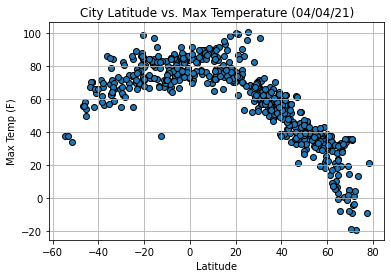

In [44]:
x_axis = weather_df["Lat"]
y_axis = weather_df["Max Temp"]

plt.scatter(x_axis, y_axis, edgecolors="black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.title("City Latitude vs. Max Temperature (04/04/21)")
plt.savefig("output_data/Lat_vs_temp.png")

This graph shows the relationship between latitude and the max temperature recorded in each city when the data was collected. 

## Latitude vs. Humidity Plot

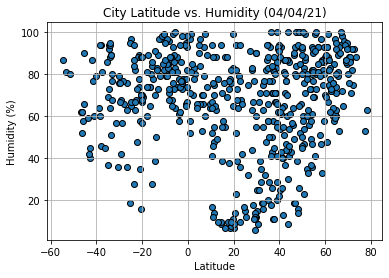

In [45]:
x_axis = weather_df["Lat"]
y_axis = weather_df["Humidity"]

plt.scatter(x_axis, y_axis, edgecolors="black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (04/04/21)")
plt.savefig("output_data/Lat_vs_Humidity.png")

This graph shows the relationship between latitude and the humidity recorded in each city when the data was collected.

## Latitude vs. Cloudiness Plot

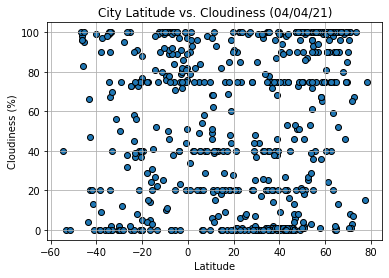

In [46]:
x_axis = weather_df["Lat"]
y_axis = weather_df["Cloudiness"]

plt.scatter(x_axis, y_axis, edgecolors="black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (04/04/21)")
plt.savefig("output_data/Lat_vs_Cloudiness.png")

This graph shows the relationship between latitude and the cloudiness recorded in each city when the data was collected.

## Latitude vs. Wind Speed Plot

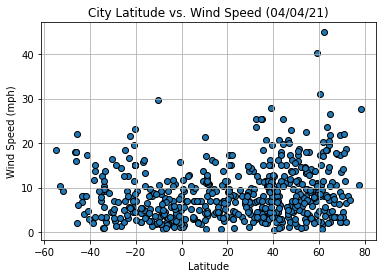

In [47]:
x_axis = weather_df["Lat"]
y_axis = weather_df["Wind Speed"]

plt.scatter(x_axis, y_axis, edgecolors="black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed (04/04/21)")
plt.savefig("output_data/Lat_vs_Windspeed.png")

This graph shows the relationship between latitude and the wind speed recorded in each city when the data was collected.

## Linear Regression

In [13]:
nh_df = weather_df.loc[weather_df["Lat"] > 0]
sh_df = weather_df.loc[weather_df["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.9107687987741172


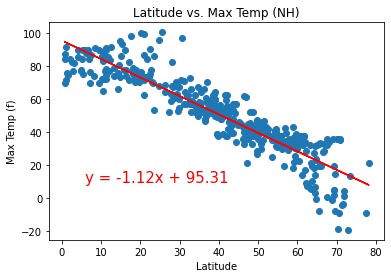

In [48]:
x_values = nh_df["Lat"]
y_values = nh_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = reg(x_values, y_values)
regress_values = x_values * slope + intercept
print(f'The r-value is: {rvalue}')
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (f)')
plt.title("Latitude vs. Max Temp (NH)")
plt.savefig("output_data/NH_temp.png")
plt.show()

This chart shows the relationship between latitude and max temperature for cities in the northern hemisphere. The regressions shows that as latitude increases, the max temperature decreases. Cities that are farther north from the equator typically have lower max temperatures.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6015411268947086


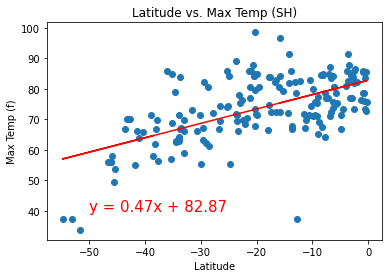

In [49]:
x_values = sh_df["Lat"]
y_values = sh_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = reg(x_values, y_values)
regress_values = x_values * slope + intercept
print(f'The r-value is: {rvalue}')
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (f)')
plt.title("Latitude vs. Max Temp (SH)")
plt.savefig("output_data/SH_temp.png")
plt.show()

This chart shows the relationship between latitude and max temperature for cities in the southern hemisphere. The regression shows that max temperatures tend to be lower in cities farther away from the equator. In conjunction with the previous chart, we can see that maximum temperatures are generally higher in cities closer to the equator and lower in cities farther away. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.25638212668382815


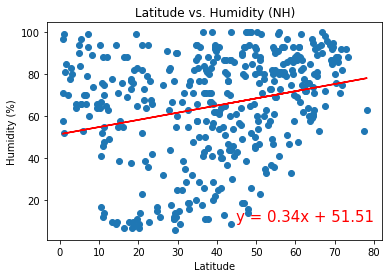

In [50]:
x_values = nh_df["Lat"]
y_values = nh_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = reg(x_values, y_values)
regress_values = x_values * slope + intercept
print(f'The r-value is: {rvalue}')
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("Latitude vs. Humidity (NH)")
plt.savefig("output_data/NH_Humidity.png")
plt.show()


This regression shows that latitude and humidity are positively correlated in the northern hemisphere. At higher latitudes, humidity is greater on average. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.28702825702129336


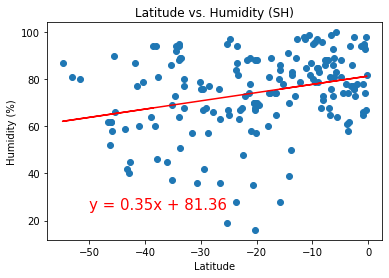

In [51]:
x_values = sh_df["Lat"]
y_values = sh_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = reg(x_values, y_values)
regress_values = x_values * slope + intercept
print(f'The r-value is: {rvalue}')
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("Latitude vs. Humidity (SH)")
plt.savefig("output_data/SH_Humidity.png")
plt.show()

Like the previous chart, this regression shows that humidity is generally greater in cities that have higher latitudes in the southern hemisphere. Unlike the max temperature charts, however, it appears that humidity is lowest in cities with the southern (negative) latitudes and greatest in cities with northern (positive) latitudes. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.2723328785281108


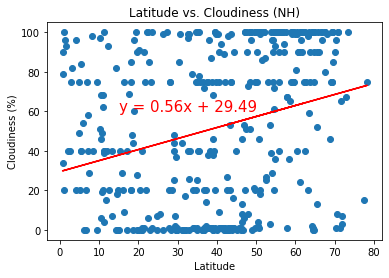

In [52]:
x_values = nh_df["Lat"]
y_values = nh_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = reg(x_values, y_values)
regress_values = x_values * slope + intercept
print(f'The r-value is: {rvalue}')
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15,60),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("Latitude vs. Cloudiness (NH)")
plt.savefig("output_data/NH_Cloudiness.png")
plt.show()

This regression for cloudiness in cities in the northern hemispheres shows that cloudiness in generally greater in cities with higher latitudes. 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.22212238677589363


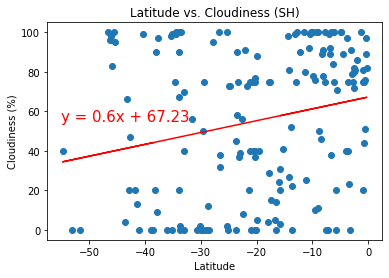

In [53]:
x_values = sh_df["Lat"]
y_values = sh_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = reg(x_values, y_values)
regress_values = x_values * slope + intercept
print(f'The r-value is: {rvalue}')
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,55),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("Latitude vs. Cloudiness (SH)")
plt.savefig("output_data/SH_Cloudiness.png")
plt.show()

In the southern hemisphere, cities with latitudes closer to the equator have higher cloudiness than those further south. The data in the northern hemisphere for cloudiness also shows that more northern latitudes have greater cloudiness. This is also the same relationship seen with humidity and latitude, and it may be worth exploring what causes greater air moisture in the northern hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.19541453228639


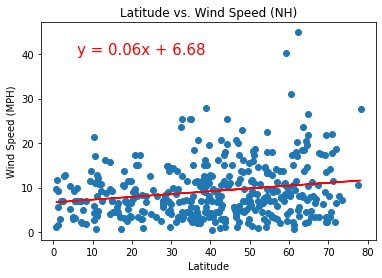

In [54]:
x_values = nh_df["Lat"]
y_values = nh_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = reg(x_values, y_values)
regress_values = x_values * slope + intercept
print(f'The r-value is: {rvalue}')
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
plt.title("Latitude vs. Wind Speed (NH)")
plt.savefig("output_data/NH_Wind.png")
plt.show()

In the northern hemisphere, it appears that wind speeds increase as latitudes increase. It does appear that the extremes of wind speeds are much higher in the highest latitudes, while most cities have a wind speed of under 20 mph. 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.3121077853734374


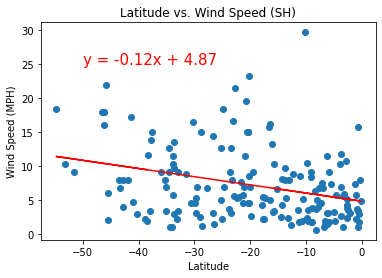

In [55]:
x_values = sh_df["Lat"]
y_values = sh_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = reg(x_values, y_values)
regress_values = x_values * slope + intercept
print(f'The r-value is: {rvalue}')
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
plt.title("Latitude vs. Wind Speed (SH)")
plt.savefig("output_data/SH_Wind.png")
plt.show()

This regression shows that wind speeds are generally lower closer to the equator and higher further south. This chart and the previous show that wind speeds are typically lower at the equator. This may be due to the seasonal temperature changes that are experienced in areas away from the equator, but further research would be needed to understand the cause of this relationship. 